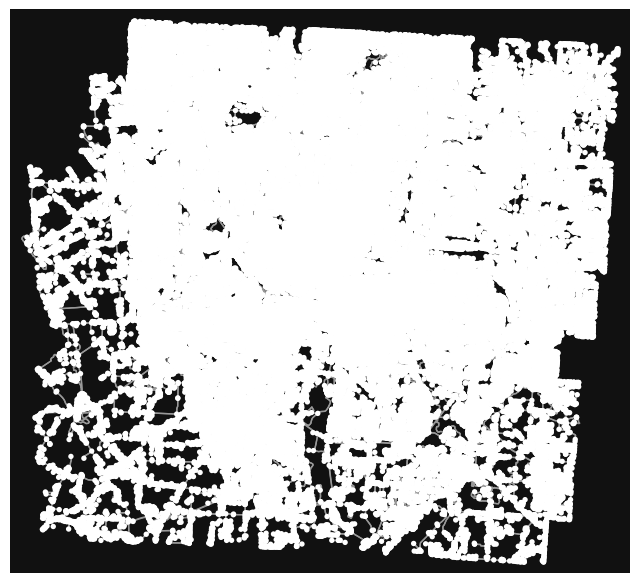

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [4]:
import osmnx as ox

# Set the place name to Franklin County, Ohio
place_name = "Franklin County, Ohio, USA"

# Extract the road network for the entire county
G = ox.graph_from_place(place_name, network_type='all')

# Visualize the network
ox.plot_graph(G)

In [5]:
type(G)

networkx.classes.multidigraph.MultiDiGraph

In [6]:
# Save nodes and edges to GeoDataFrames
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

In [14]:
import pandas as pd
flattened_highways = pd.Series([item for sublist in gdf_edges["highway"] for item in (sublist if isinstance(sublist, list) else [sublist])])
print(type(flattened_highways))
print(flattened_highways.unique())

<class 'pandas.core.series.Series'>
['residential' 'service' 'trunk' 'tertiary' 'primary' 'secondary'
 'cycleway' 'unclassified' 'motorway_link' 'secondary_link' 'path'
 'motorway' 'footway' 'trunk_link' 'primary_link' 'track' 'living_street'
 'steps' 'pedestrian' 'tertiary_link' 'corridor' 'bridleway' 'elevator']


C:\Users\Charlie\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


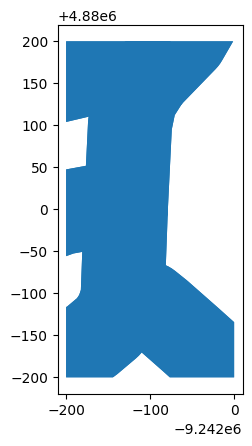

In [19]:
import csv
import shapely.wkt
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, box
import geopandas as gpd

roads = []
with open('roads.csv', newline='') as file:
    reader = csv.reader(file)
    for row in reader:
        if row[0] == "geometry":
            continue
        if row[1] == "residential":
            roads.append(shapely.wkt.loads(row[0]).buffer(50))

gdf = gpd.GeoDataFrame(geometry=roads)

# Define the cropping area using a bounding box
# Example bounding box (minx, miny, maxx, maxy)
crop_box = box(-9242200, 4879800, -9242000, 4880200)

# Crop the polygons by intersecting them with the bounding box
gdf_cropped = gdf[gdf.intersects(crop_box)]
gdf_cropped['geometry'] = gdf_cropped.intersection(crop_box)

# Plot the cropped polygons using GeoPandas
gdf_cropped.plot()

# Show the plot
plt.show()